<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM과 GRU 셀

## LSTM 신경망 훈련하기

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [23]:
# pad_sequences() 함수로 각 샘플의 길이 맞추기
from keras.utils import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [24]:
# LSTM 셀을 사용한 순환층
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6926 - accuracy: 0.5396 - val_loss: 0.6920 - val_accuracy: 0.5642
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6905 - accuracy: 0.5960 - val_loss: 0.6893 - val_accuracy: 0.6026
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6859 - accuracy: 0.6271 - val_loss: 0.6828 - val_accuracy: 0.6390
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6746 - accuracy: 0.6642 - val_loss: 0.6663 - val_accuracy: 0.6604
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6359 - accuracy: 0.6949 - val_loss: 0.5982 - val_accuracy: 0.7142
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5635 - accuracy: 0.7398 - val_loss: 0.5510 - val_accuracy: 0.7426
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5282 - accuracy: 0.7566 - val_loss: 0.5202 - val_accuracy: 0.758

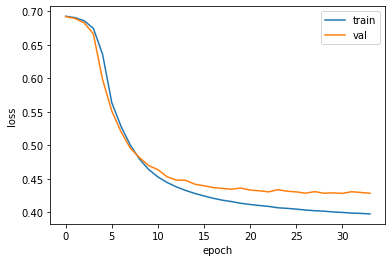

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환층에 드롭아웃 적용하기

In [36]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [37]:
rmsporp = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 11ms/step - loss: 0.6925 - accuracy: 0.5411 - val_loss: 0.6918 - val_accuracy: 0.5944
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6907 - accuracy: 0.5950 - val_loss: 0.6892 - val_accuracy: 0.6366
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6867 - accuracy: 0.6287 - val_loss: 0.6832 - val_accuracy: 0.6436
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6756 - accuracy: 0.6277 - val_loss: 0.6602 - val_accuracy: 0.6242
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6355 - accuracy: 0.6709 - val_loss: 0.6124 - val_accuracy: 0.7292
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5959 - accuracy: 0.7372 - val_loss: 0.5821 - val_accuracy: 0.7460
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5750 - accuracy: 0.7561 - val_loss: 0.5671 - val_accuracy: 

## 2개의 층을 연결하기

In [38]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [39]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_9 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_10 (LSTM)              (None, 8)                 544       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [40]:
rmsporp = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 16ms/step - loss: 0.6926 - accuracy: 0.5290 - val_loss: 0.6918 - val_accuracy: 0.5480
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6893 - accuracy: 0.5897 - val_loss: 0.6854 - val_accuracy: 0.6452
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6717 - accuracy: 0.6559 - val_loss: 0.6476 - val_accuracy: 0.6852
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6041 - accuracy: 0.7140 - val_loss: 0.5711 - val_accuracy: 0.7302
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5555 - accuracy: 0.7344 - val_loss: 0.5407 - val_accuracy: 0.7432
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5333 - accuracy: 0.7480 - val_loss: 0.5196 - val_accuracy: 0.7512
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5156 - accuracy: 0.7592 - val_loss: 0.5045 - val_accuracy:

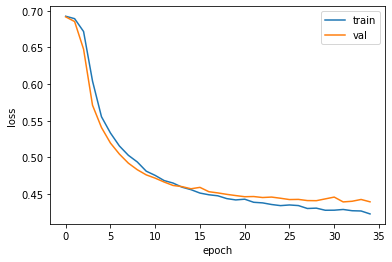

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 구조

## GRU 신경망 훈련하기

In [42]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [43]:
model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 16)           8000      
                                                                 
 gru_2 (GRU)                 (None, 8)                 624       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [44]:
rmsporp = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6921 - accuracy: 0.5303 - val_loss: 0.6915 - val_accuracy: 0.5494
Epoch 2/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6898 - accuracy: 0.5727 - val_loss: 0.6888 - val_accuracy: 0.5770
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6857 - accuracy: 0.5968 - val_loss: 0.6841 - val_accuracy: 0.5876
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6785 - accuracy: 0.6170 - val_loss: 0.6759 - val_accuracy: 0.6020
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6661 - accuracy: 0.6371 - val_loss: 0.6609 - val_accuracy: 0.6340
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6444 - accuracy: 0.6598 - val_loss: 0.6346 - val_accuracy: 0.6616
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6015 - accuracy: 0.6896 - val_loss: 0.5808 - val_accuracy: 0.70

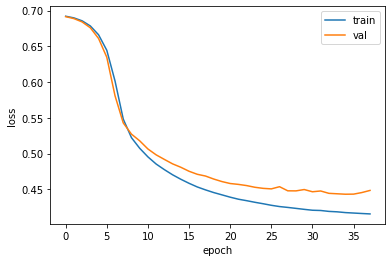

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [48]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 6ms/step - loss: 0.4328 - accuracy: 0.7986


[0.43277594447135925, 0.7985600233078003]